In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleaning

In [4]:
def hr_analytics_data_cleaning(df):
    # Droping Columns Not Used in Analysis
    drop_cols = ['over_18', 'emp_count', 'standard_hours', 'emp_id']
    df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')
    
    # Impute Missing Values
    for col in df.select_dtypes(include='number').columns:
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Standardize Text Columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.lower().str.strip()
    
    # Map Categories
    education_map = {
        1: 'below_college',
        2: 'college',
        3: 'bachelor',
        4: 'master',
        5: 'doctor'
    }
    if 'education_level' in df.columns:
        df['education_level'] = df['education_level'].replace(education_map)

    sat_map = {1: 'low', 2: 'medium', 3: 'high', 4: 'very_high'}
    for sat_col in ['environment_satisfaction', 'job_involvement', 'job_satisfaction',
                    'performance_rating', 'relationship_satisfaction', 'work_life_balance']:
        if sat_col in df.columns:
            df[sat_col] = df[sat_col].replace(sat_map)

    # Rearrange Columns (example ordering, adjust as needed)
    col_order = [
        'attrition', 'age', 'gender', 'department', 'job_role', 'marital_status',
        'education_level', 'education_field', 'distance_from_home', 'business_travel', 
        'overtime', 'monthly_income', 'monthly_rate', 'daily_rate', 'hourly_rate',
        'job_level', 'total_working_years', 'years_at_company', 'years_in_current_role',
        'years_since_last_promotion', 'years_with_current_manager',
        'environment_satisfaction', 'job_involvement', 'job_satisfaction', 
        'performance_rating', 'relationship_satisfaction', 'work_life_balance',
        'num_companies_worked', 'training_times_last_year', 'stock_option_level', 
        'percent_salary_hike'
    ]
    df = df[[c for c in col_order if c in df.columns]]

    return df

# Data Understanding

In [6]:
def hr_analytics_data_understanding(df):
    print(f"{'*' * 50} Data Information {'*' * 50}")
    print(df.info())

    print(f"{'*' * 50} Data Types {'*' * 50}")
    print(df.dtypes)

    print(f"\n{'*' * 50} Checking For Duplicate Rows {'*' * 50}")
    print(f"Total Duplicates: {df.duplicated().sum()}")

    print(f"\n{'*' * 50} Numerical Columns Summary {'*' * 50}")
    print(df.describe())

    print(f"\n{'*' * 50} Categorical Columns Summary {'*' * 50}")
    print(df.describe(include='object'))

    print(f"\n{'*' * 50} Sample Data {'*' * 50}")
    print(df.head())

hr_analytics_data_understanding(df)

************************************************** Data Information **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate   

# Data Visualization

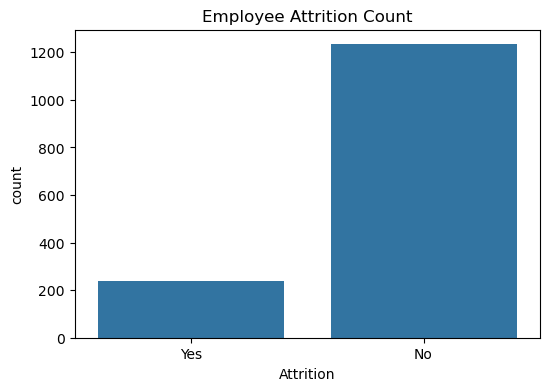

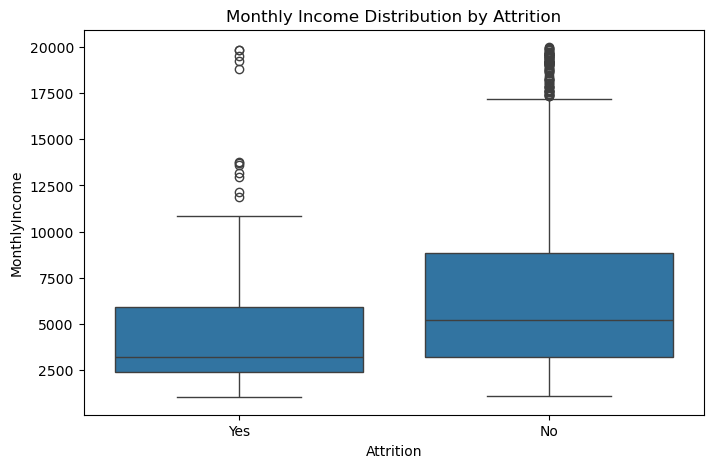

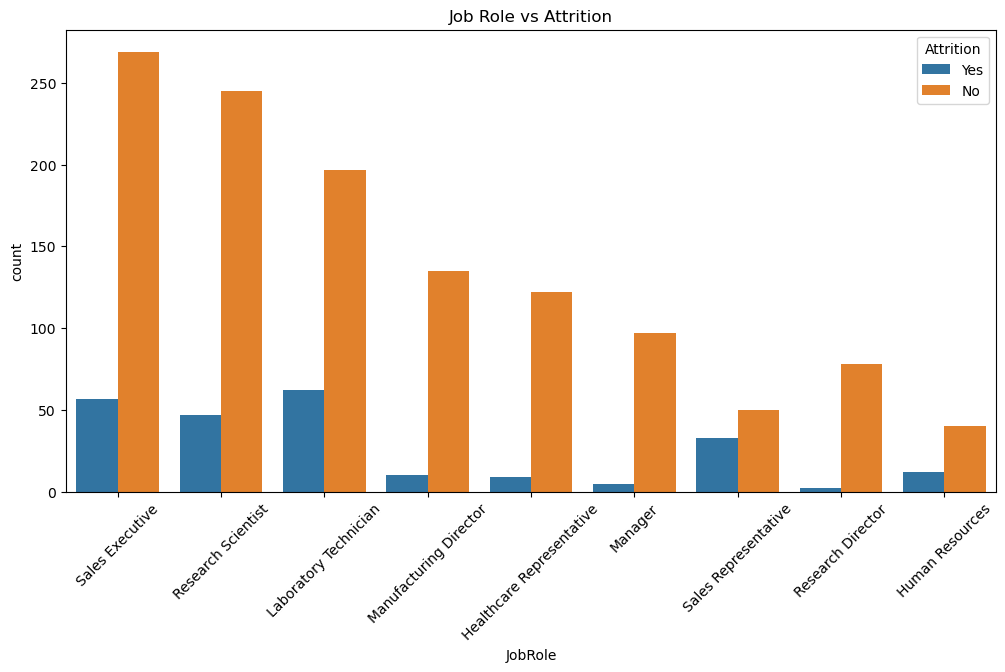

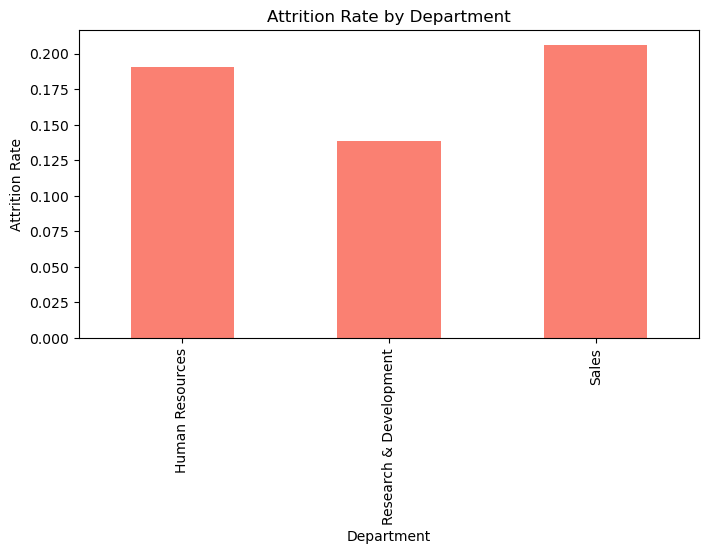

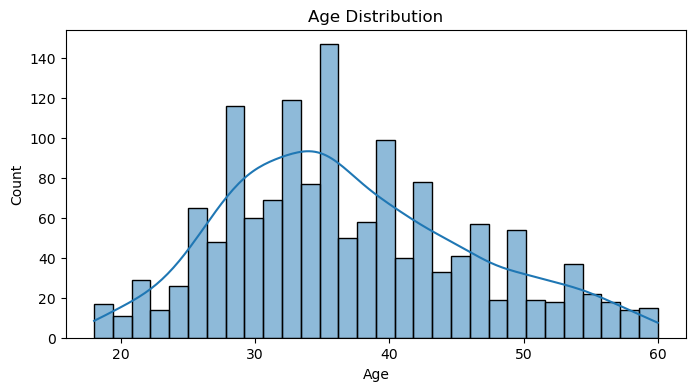

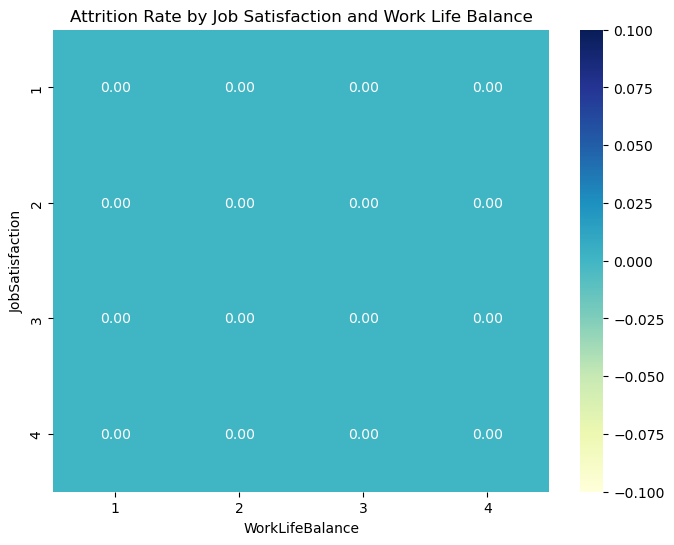

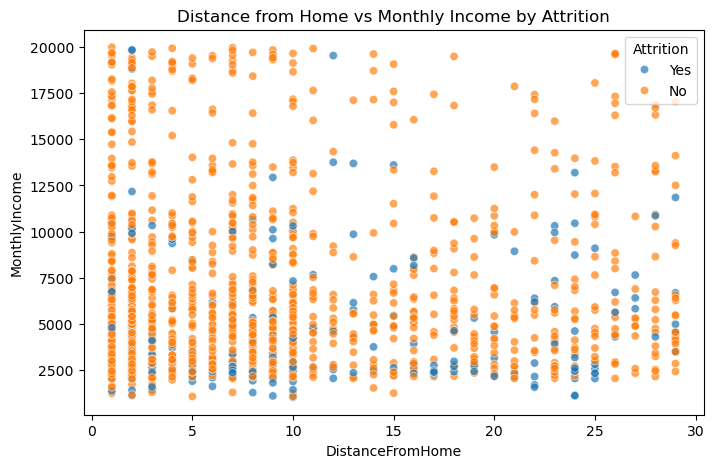

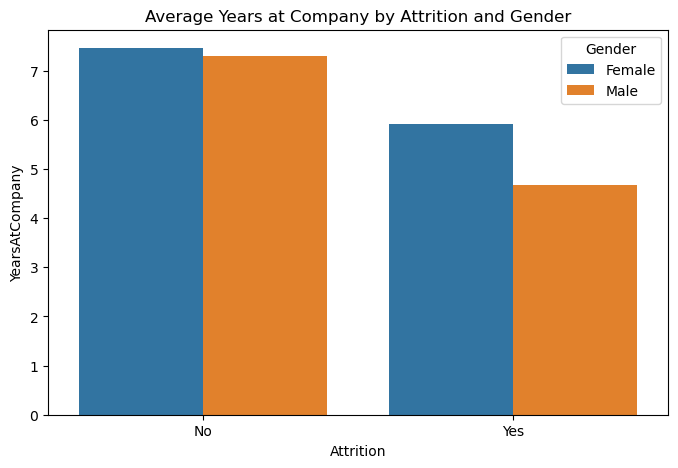

In [8]:
def hr_analytics_visualizations(df):
    # Basic attrition count plot
    plt.figure(figsize=(6,4))
    sns.countplot(x='Attrition', data=df)
    plt.title('Employee Attrition Count')
    plt.show()

    # Monthly Income by Attrition Boxplot
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
    plt.title('Monthly Income Distribution by Attrition')
    plt.show()
    
    # Job Role counts by Attrition
    plt.figure(figsize=(12,6))
    sns.countplot(x='JobRole', hue='Attrition', data=df)
    plt.xticks(rotation=45)
    plt.title('Job Role vs Attrition')
    plt.show()

    # Attrition rate by Department
    plt.figure(figsize=(8,4))
    dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
    if 'Yes' in dept_attrition.columns:
        dept_attrition['Yes'].plot(kind='bar', color='salmon')
        plt.ylabel('Attrition Rate')
        plt.title('Attrition Rate by Department')
        plt.show()

    # Age Distribution Histogram
    plt.figure(figsize=(8,4))
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.show()

    # Heatmap: Attrition rate by Job Satisfaction and Work Life Balance
    plt.figure(figsize=(8,6))
    attr_job_worklife = df.pivot_table(index='JobSatisfaction', columns='WorkLifeBalance', values='Attrition', aggfunc=lambda x: (x=='yes').mean())
    sns.heatmap(attr_job_worklife, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Attrition Rate by Job Satisfaction and Work Life Balance')
    plt.show()

    # Scatter plot: Distance from Home vs Monthly Income by Attrition
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', alpha=0.7)
    plt.title('Distance from Home vs Monthly Income by Attrition')
    plt.show()

    # Average Years at Company by Attrition and Gender
    plt.figure(figsize=(8,5))
    avg_years = df.groupby(['Attrition','Gender'])['YearsAtCompany'].mean().reset_index()
    sns.barplot(data=avg_years, x='Attrition', y='YearsAtCompany', hue='Gender')
    plt.title('Average Years at Company by Attrition and Gender')
    plt.show()

hr_analytics_visualizations(df)

In [9]:
# Clean and Save Processed Data
df.to_csv('cleaned_HR-Employee-Attrition.csv', index=False)

# Machine Learning

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [13]:
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [14]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [15]:
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8809523809523809

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294


Confusion Matrix:
 [[254   1]
 [ 34   5]]
